 Question:
 You are tasked with building a sentiment analysis model to classify movie reviews as positive or negative
 using the IMDB Movie Review Dataset.
 Part 1:
 1. Load the dataset and preprocess the reviews.
 a. Convert all text to lowercase.
 b. Remove non-alphabetic characters (punctuation).
 c. Tokenize the reviews and remove common stopwords.
 d. Apply stemming to reduce words to their root form.
 2. Split the dataset into training and testing sets (80% training, 20% testing).
 3. Use a Naive Bayes classifier to classify the reviews into positive and negative categories.
 a. Implement a Bag-of-Words model using CountVectorizer.
 b. Train the Naive Bayes classifier using the training set.


In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import movie_reviews
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
import re
import string
import random

dataframe = pd.read_csv("/content/drive/MyDrive/AI_SEM3/Datasets/spam_ham_dataset.csv")
dataframe.head()



,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [3]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
corpus = []
length = len(dataframe)
for i in range(0, length):
    # re is used to remove punctuation
    text = re.sub('[^a-zA-Z]', ' ', dataframe['text'][i])

    text = text.lower()
    # stemming
    text = text.split()
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    text = [ps.stem(word) for word in text if not word in set(all_stopwords)]
    text = ' '.join(text)
    corpus.append(text)


RE-VERIFYING AND FURTHER CLEANING

In [5]:
data_check = dataframe.copy()
data_check['cleanText'] = corpus
data_check.head()

,Unnamed: 0,label,text,label_num,cleanText
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,subject enron methanol meter follow note gave ...
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,subject hpl nom januari see attach file hplnol...
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,subject neon retreat ho ho ho around wonder ti...
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,subject photoshop window offic cheap main tren...
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,subject indian spring deal book teco pvr reven...


In [6]:
data_check['cleanText']=data_check['cleanText'].str.replace('subject', '')
data_check.head()

,Unnamed: 0,label,text,label_num,cleanText
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,enron methanol meter follow note gave monday ...
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,hpl nom januari see attach file hplnol xl hpl...
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,neon retreat ho ho ho around wonder time year...
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,photoshop window offic cheap main trend abas ...
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,indian spring deal book teco pvr revenu under...


CONSTUCTION FEATURE MATRIX AND LABEL VECTOR

In [7]:
x = data_check.loc[:, 'cleanText'].values
y = data_check.loc[:, 'label_num'].values

TEXT REPRESENTATION USING COUNT VECTORIZATION

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)
x = cv.fit_transform(x).toarray()

FINAL MODEL BUILDING USING SCIKIT LEARN

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [10]:
model=MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

FINAL EVALUATION

In [11]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9304347826086956


In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       732
           1       0.86      0.91      0.88       303

    accuracy                           0.93      1035
   macro avg       0.91      0.92      0.92      1035
weighted avg       0.93      0.93      0.93      1035



SENTIMENT ANALYSIS MODEL FOR IMDB MOVIE REVIEW

In [13]:
df= pd.read_csv('/content/drive/MyDrive/AI_SEM3/Datasets/IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


PART 1

In [14]:
corpus = []
for i in range(0, len(df)):
    # re is used to remove punctuation
    text = re.sub('[^a-zA-Z]', ' ', df['review'][i])

    text = text.lower()
    # stemming
    text = text.split()
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    text = [ps.stem(word) for word in text if not word in set(all_stopwords)]
    text = ' '.join(text)
    corpus.append(text)


In [20]:
data_check2 = df.copy()
data_check2['cleanText'] = corpus
data_check2.head()

,review,sentiment,cleanText
0,One of the other reviewers has mentioned that ...,positive,one review mention watch oz episod hook right ...
1,A wonderful little production. <br /><br />The...,positive,wonder littl product br br film techniqu unass...
2,I thought this was a wonderful way to spend ti...,positive,thought wonder way spend time hot summer weeke...
3,Basically there's a family where a little boy ...,negative,basic famili littl boy jake think zombi closet...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visual stun film...


In [22]:
df['sentiment'].value_counts()

,count
sentiment,
positive,25000
negative,25000


In [23]:
#Encode target variable
data_check2['sentiment'] = data_check2['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)
data_check2.head()

,review,sentiment,cleanText
0,One of the other reviewers has mentioned that ...,1,one review mention watch oz episod hook right ...
1,A wonderful little production. <br /><br />The...,1,wonder littl product br br film techniqu unass...
2,I thought this was a wonderful way to spend ti...,1,thought wonder way spend time hot summer weeke...
3,Basically there's a family where a little boy ...,0,basic famili littl boy jake think zombi closet...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,petter mattei love time money visual stun film...


**CONSTRUCT FEATURE AND TARGET VARIABLE**

In [28]:
x2 = data_check2.loc[:, 'cleanText'].values
y2 = data_check2.loc[:, 'sentiment'].values

cv = CountVectorizer(max_features=1500)
x2 = cv.fit_transform(x2).toarray()

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=42)

model = MultinomialNB()
model.fit(x2_train, y2_train)


MultinomialNB()

FINAL EVALUATION

In [29]:
y_pred = model.predict(x2_test)
accuracy = accuracy_score(y2_test, y_pred)
print(accuracy)

0.8404


In [31]:
classification = classification_report(y2_test, y_pred)
print("Classification: \n", classification)

Classification: 
               precision    recall  f1-score   support

           0       0.84      0.83      0.84      4961
           1       0.84      0.85      0.84      5039

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



**CONFUSION MATRIX**

In [33]:
cm = confusion_matrix(y2_test, y_pred)
print("Confusion Matrix: \n", cm)

Confusion Matrix: 
 [[4135  826]
 [ 770 4269]]


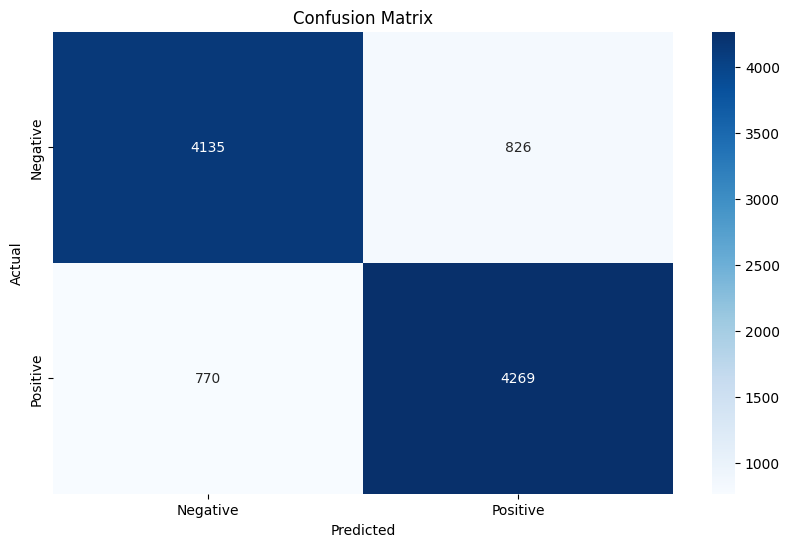

In [34]:
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**ROC AUC CURVE**

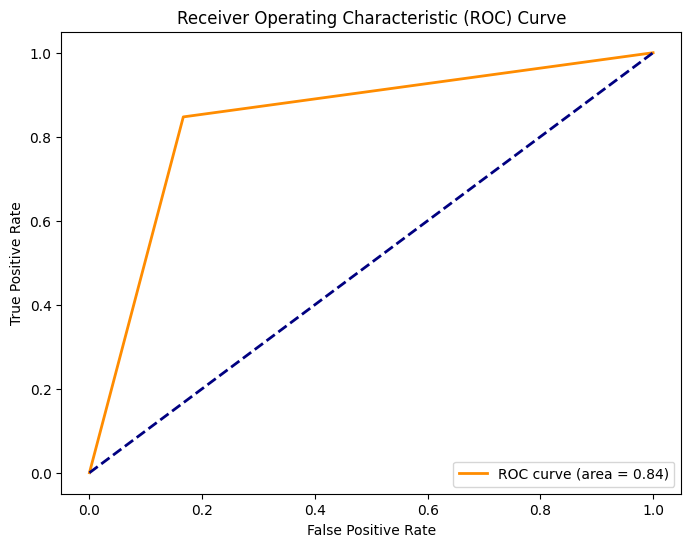

In [37]:
fpr, tpr, thresholds = roc_curve(y2_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % accuracy)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()